In [1]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# [그림 4-3(b)]의 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [2]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

# 옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(식 (4.3))
def forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s)
    return o

# 손실 함수 정의
def loss():
    o=forward()
    return tf.reduce_mean((y-o)**2)
# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss, var_list=[w,b])
    if(i%100==0): print('loss at epoch',i,'=',loss().numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.5376792
loss at epoch 100 = 0.085586205
loss at epoch 200 = 0.040763877
loss at epoch 300 = 0.02593986
loss at epoch 400 = 0.018799307
tf.Tensor(
[[-0.81758845]
 [ 0.8871118 ]
 [ 0.8871526 ]
 [ 0.9992823 ]], shape=(4, 1), dtype=float32)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

In [6]:
n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 0.9529 - mse: 0.9529 - 473ms/epoch - 473ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7246 - mse: 0.7246 - 8ms/epoch - 8ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6251 - mse: 0.6251 - 11ms/epoch - 11ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5753 - mse: 0.5753 - 7ms/epoch - 7ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5445 - mse: 0.5445 - 8ms/epoch - 8ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5221 - mse: 0.5221 - 7ms/epoch - 7ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5039 - mse: 0.5039 - 9ms/epoch - 9ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4880 - mse: 0.4880 - 8ms/epoch - 8ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4735 - mse: 0.4735 - 8ms/epoch - 8ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4600 - mse: 0.4600 - 6ms/epoch - 6ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4472 - mse: 0.4472 - 8ms/epoch - 8ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4349 - mse: 0.4349 - 13ms/epoch - 13ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4231 - mse: 0.4231 - 8ms/epoch - 8ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4118 - 

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)
n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 8s - loss: 0.0436 - accuracy: 0.8404 - val_loss: 0.0277 - val_accuracy: 0.9140 - 8s/epoch - 18ms/step
Epoch 2/30
469/469 - 7s - loss: 0.0227 - accuracy: 0.9277 - val_loss: 0.0193 - val_accuracy: 0.9412 - 7s/epoch - 14ms/step
Epoch 3/30
469/469 - 7s - loss: 0.0167 - accuracy: 0.9466 - val_loss: 0.0149 - val_accuracy: 0.9490 - 7s/epoch - 15ms/step
Epoch 4/30
469/469 - 7s - loss: 0.0138 - accuracy: 0.9555 - val_loss: 0.0134 - val_accuracy: 0.9568 - 7s/epoch - 15ms/step
Epoch 5/30
469/469 - 7s - loss: 0.0121 - accuracy: 0.9618 - val_loss: 0.0126 - val_accuracy: 0.9611 - 7s/epoch - 15ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0110 - accuracy: 0.9663 - val_loss: 0.0107 - val_accuracy: 0.9651 - 8s/epoch - 16ms/step
Epoch 7/30
469/469 - 7s - loss: 0.0100 - accuracy: 0.9698 - val_loss: 0.0100 - val_accuracy: 0.9670 - 7s/epoch - 16ms/step
Epoch 8/30
469/469 - 7s - loss: 0.0094 - accuracy: 0.9726 - val_loss: 0.0100 - val_accuracy: 0.9678 - 7s/epoch - 15ms/step
Epoch 9/30
469/4

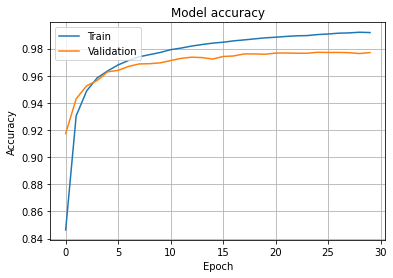

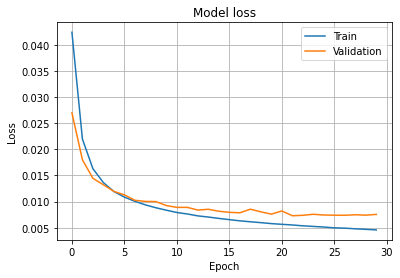

In [11]:
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()
# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)
n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

Epoch 1/30
469/469 - 7s - loss: 0.0047 - accuracy: 0.9929 - val_loss: 0.0072 - val_accuracy: 0.9763 - 7s/epoch - 15ms/step
Epoch 2/30
469/469 - 7s - loss: 0.0044 - accuracy: 0.9929 - val_loss: 0.0074 - val_accuracy: 0.9761 - 7s/epoch - 14ms/step
Epoch 3/30
469/469 - 7s - loss: 0.0043 - accuracy: 0.9937 - val_loss: 0.0072 - val_accuracy: 0.9763 - 7s/epoch - 14ms/step
Epoch 4/30
469/469 - 7s - loss: 0.0043 - accuracy: 0.9939 - val_loss: 0.0075 - val_accuracy: 0.9777 - 7s/epoch - 14ms/step
Epoch 5/30
469/469 - 7s - loss: 0.0042 - accuracy: 0.9941 - val_loss: 0.0073 - val_accuracy: 0.9766 - 7s/epoch - 14ms/step
Epoch 6/30
469/469 - 8s - loss: 0.0042 - accuracy: 0.9938 - val_loss: 0.0075 - val_accuracy: 0.9767 - 8s/epoch - 17ms/step
Epoch 7/30
469/469 - 7s - loss: 0.0041 - accuracy: 0.9942 - val_loss: 0.0075 - val_accuracy: 0.9766 - 7s/epoch - 14ms/step
Epoch 8/30
469/469 - 7s - loss: 0.0040 - accuracy: 0.9946 - val_loss: 0.0075 - val_accuracy: 0.9756 - 7s/epoch - 14ms/step
Epoch 9/30
469/4

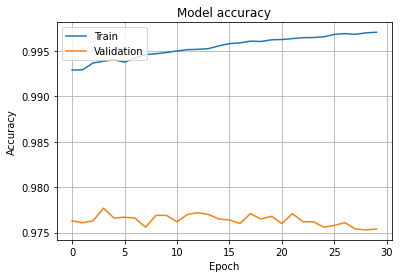

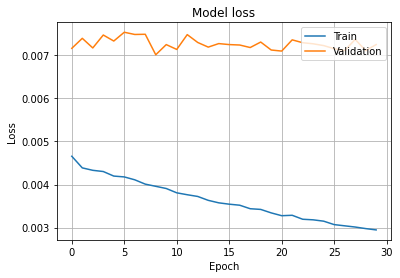

In [19]:
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()
# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

In [17]:
#은닉층을 조금 더 추가 시켜서 정확률을 더 올려보자....

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

mlp.add(Dense(units=512,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=512,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=512,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

Epoch 1/30
469/469 - 17s - loss: 0.0163 - accuracy: 0.8927 - val_loss: 0.0108 - val_accuracy: 0.9294 - 17s/epoch - 37ms/step
Epoch 2/30
469/469 - 19s - loss: 0.0096 - accuracy: 0.9383 - val_loss: 0.0088 - val_accuracy: 0.9423 - 19s/epoch - 41ms/step
Epoch 3/30
469/469 - 17s - loss: 0.0074 - accuracy: 0.9520 - val_loss: 0.0068 - val_accuracy: 0.9545 - 17s/epoch - 37ms/step
Epoch 4/30
469/469 - 16s - loss: 0.0061 - accuracy: 0.9614 - val_loss: 0.0060 - val_accuracy: 0.9606 - 16s/epoch - 35ms/step
Epoch 5/30
469/469 - 18s - loss: 0.0050 - accuracy: 0.9687 - val_loss: 0.0052 - val_accuracy: 0.9673 - 18s/epoch - 38ms/step
Epoch 6/30
469/469 - 16s - loss: 0.0043 - accuracy: 0.9738 - val_loss: 0.0046 - val_accuracy: 0.9707 - 16s/epoch - 35ms/step
Epoch 7/30
469/469 - 16s - loss: 0.0037 - accuracy: 0.9769 - val_loss: 0.0043 - val_accuracy: 0.9710 - 16s/epoch - 35ms/step
Epoch 8/30
469/469 - 17s - loss: 0.0032 - accuracy: 0.9806 - val_loss: 0.0041 - val_accuracy: 0.9716 - 17s/epoch - 36ms/step


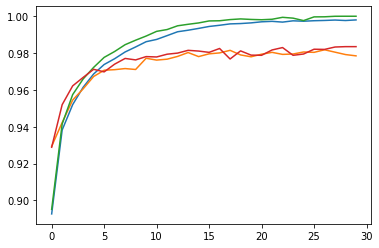

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10
# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)
# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)
# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])